# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o gráfico
import screeplot as sps

# classe do scikit-learn para padronizar os dados pela fórmula: Z= (x - média) / Desv. Padrão
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [2]:
filename_features = "dados/features.txt"
filename_labels = "dados/activity_labels.txt"

filename_subtrain = "dados/subject_train.txt"
filename_xtrain = "dados/X_train.txt"
filename_ytrain = "dados/y_train.txt"

filename_subtest = "dados/subject_test.txt"
ffilename_xtest = "dados/X_test.txt"
filename_ytest = "dados/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
features = features.squeeze(1)
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
subject_train = subject_train.squeeze(1)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
subject_test = subject_test.squeeze(1)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

### Padronização das variáveis

In [3]:
%%time

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train, y_train)

X_scaled = pd.DataFrame(scaled_data, columns = X_train.columns)

X_scaled.head()

CPU times: user 57.7 ms, sys: 9.18 ms, total: 66.8 ms
Wall time: 63.6 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


### Análise de componentes principais com dados padronizados

In [4]:
pca_scaled = PCA()
pca_scaled.set_output(transform="pandas")
princomp = pca_scaled.fit(X_scaled)

Número de componentes:............... 63
Variância da ultima CP:.............. 0.99
Variância total explicada:........... 505.27
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 90.05%


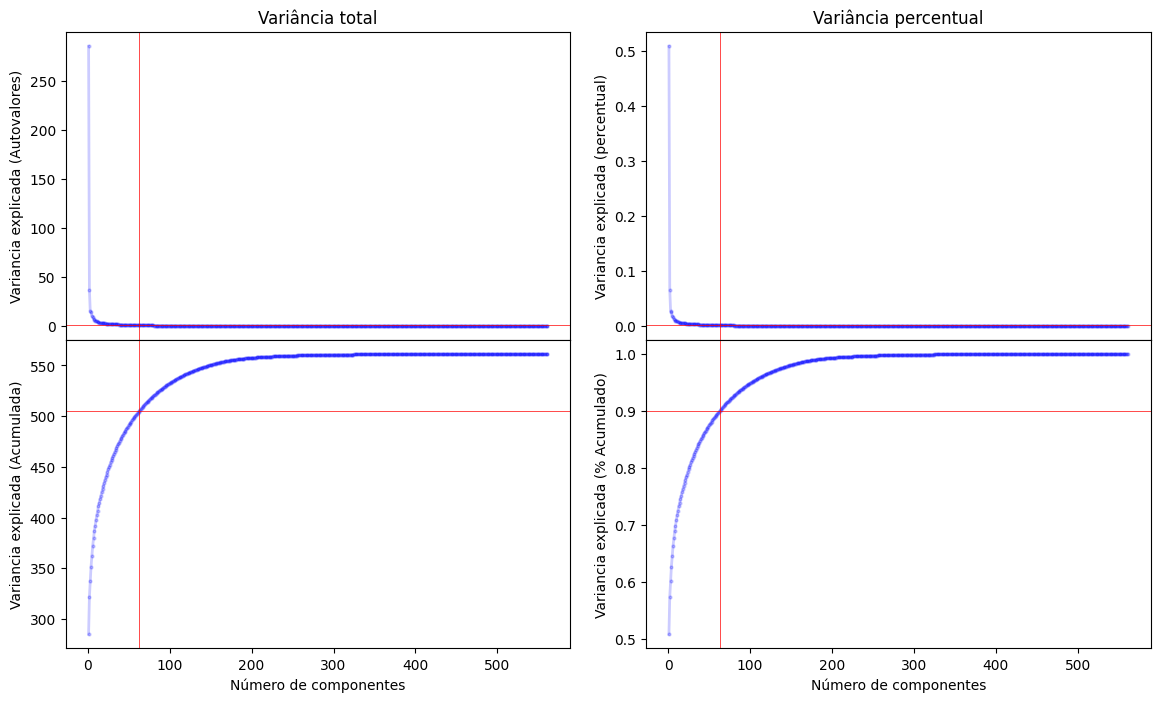

In [5]:
# 90% da variância explicada:
# - por componente
# - acumulada por componente
# - percentual por componente
# - percentual acumulada por componente

_ = sps.screeplot(princomp, varexplicada=.90)

**Quantas componentes você escolheria, em cada caso para explicar 90% da variância?**
> Para explicar 90% da variância escolheríamos 63 componentes

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

#### Convertendo os dados de treino e teste

In [6]:
# união dos dados de treino e teste para padronizar as variáveis
base = pd.concat([X_train, X_test])

# cria o conversor
scaler = StandardScaler()
scaled_data = scaler.fit_transform(base)

# cria um novo Dataframe para os dados convertidos
base_scaled = pd.DataFrame(scaled_data, columns = base.columns)

# separando os dados de treino e teste novamente, agora com os dados padronizados
base_train_scaled = base_scaled.iloc[0:X_train.shape[0], 0:X_train.shape[1]]
base_test_scaled  = base_scaled.iloc[X_train.shape[0]: , 0:X_train.shape[1]]

#### Obtendo 10 componentes principais com os dados padronizados

In [7]:
pca_scaled = PCA(n_components=10)
pca_scaled.set_output(transform="pandas")
pca_scaled.fit(base_train_scaled)

X_train_scaled = pca_scaled.transform(base_train_scaled)
X_test_scaled  = pca_scaled.transform(base_test_scaled)

#### Obtendo 10 componentes principais com os dados normais

In [8]:
pca_normal = PCA(n_components=10)
pca_normal.set_output(transform="pandas")
pca_normal.fit(X_train)

X_train_normal = pca_normal.transform(X_train)
X_test_normal  = pca_normal.transform(X_test)

#### Árvore de decisão com dados padronizados

In [9]:
%%time

clf_scaled = DecisionTreeClassifier(ccp_alpha=0.001, random_state=1234)
clf_scaled.fit(X_train_scaled, y_train)

train_scaled_score = clf_scaled.score(X_train_scaled, y_train)
test_scaled_score  = clf_scaled.score(X_test_scaled, y_test)

print(f'Acurácia na base de treino:    {train_scaled_score*100:.1f}')
print(f'Acurácia na base de teste:     {test_scaled_score*100:.1f}')

Acurácia na base de treino:    86.1
Acurácia na base de teste:     77.8
CPU times: user 120 ms, sys: 9.27 ms, total: 129 ms
Wall time: 126 ms


#### Árvore de decisão com dados normais

In [10]:
%%time

clf_normal = DecisionTreeClassifier(ccp_alpha=0.001, random_state=1234)
clf_normal.fit(X_train_normal, y_train)

train_normal_score = clf_normal.score(X_train_normal, y_train)
test_normal_score  = clf_normal.score(X_test_normal, y_test)

print(f'Acurácia na base de treino:    {train_normal_score*100:.1f}')
print(f'Acurácia na base de teste:     {test_normal_score*100:.1f}')

Acurácia na base de treino:    89.3
Acurácia na base de teste:     82.4
CPU times: user 155 ms, sys: 10.8 ms, total: 166 ms
Wall time: 161 ms


**Compare a acurácia na base de treino e teste.**
> A acurácia na base de treino e teste com os dados normais foi maior do que a acurácia com os dados padronizados.